# Preprocesamiento

In [ ]:
import os
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# df por data frame
df = pd.read_csv('train-balanced-sarcasm.csv')
# drop na 
df.dropna(subset=['comment'], inplace=True)

In [ ]:
#Funcion de Prepocesamiento y Tokenizacion
def my_tokenizer(corpus):
    corpus_tokenized = []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    sbs = nltk.stem.SnowballStemmer('english', ignore_stopwords=False)
    for comment in corpus:
        words = tokenizer.tokenize(comment)
        # Quitar stop words (artículos, pronombres, preposiciones)
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if not word in stop_words]
        
        cmnt_t = []
        for token in words:
            cmnt_t.append(sbs.stem(token))
            # string compatible con TfidfVectorizer
            c = ' '.join(cmnt_t)
        # Lemmitize
        #words = [lemmatizer.lemmatize(word) for word in words]
        corpus_tokenized.append(c)
    return corpus_tokenized

In [ ]:
#Tokenizacion de los comentarios
df2 = pd.Series(my_tokenizer(df.comment))

for i in range(10):
    print(df.comment[i])
    print(df2[i], '\n')

NC and NH.
nc nh 

You do know west teams play against west teams more than east teams right?
you know west team play west team east team right 

They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1
they underdog earlier today sinc gronk announc afternoon vega line move patriot 1 

This meme isn't funny none of the "new york nigga" ones are.
this meme funni none new york nigga one 

I could use one of those tools.
i could use one tool 

I don't pay attention to her, but as long as she's legal I wouldn't kick her out of bed (before she took a load)
i pay attent long legal i kick bed took load 

Trick or treating in general is just weird...
trick treat general weird 

Blade Mastery+Masamune or GTFO!
blade masteri masamun gtfo 

You don't have to, you have a good build, buy games or save it
you good build buy game save 

I would love to see him at lolla.
i would love see lolla 



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1,3))
T = tf_idf_vectorizer.fit(df2)
print(str(tf_idf_vectorizer))
print(len(T.vocabulary_))
print(str(T.vocabulary_)[0:500])

TfidfVectorizer(ngram_range=(1, 3))
6268559
{'nc': 3542268, 'nh': 3610596, 'nc nh': 3542374, 'you': 6224152, 'know': 2838093, 'west': 5929204, 'team': 5230273, 'play': 4034529, 'east': 1533044, 'right': 4475474, 'you know': 6233198, 'know west': 2864119, 'west team': 5930121, 'team play': 5234833, 'play west': 4048247, 'team east': 5231985, 'east team': 1533873, 'team right': 5235414, 'you know west': 6233870, 'know west team': 2864124, 'west team play': 5930128, 'team play west': 5234909, 'play west team': 4048253, 'west team east': 5930


In [ ]:
from sklearn.model_selection import train_test_split
# divide into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df2, df.label, train_size=0.33)

print("\n")
print("Numero de comeentarios para Training/Testing:")
print(len(X_train))
print(len(X_test))



Numero de comeentarios para Training/Testing:
333555
677218


In [ ]:
# Vetorize the large training data set
X_train = tf_idf_vectorizer.fit_transform(X_train)
X_test = tf_idf_vectorizer.transform(X_test)
#print(X_train.shape)

# Procesamiento SVM



**Linear SVC**

In [ ]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train,y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score

lin_svm_pred = lin_svm.predict(X_test)
print(str(lin_svm_pred))
accuracy_score(y_test, lin_svm_pred)

[1 0 0 ... 1 1 1]


0.6805873441048526

**RBF**

In [ ]:
from sklearn.svm import SVC

rbf_svm = SVC(C=1, kernel='rbf')
rbf_svm.fit(X_train,y_train)


SVC(C=1)

In [ ]:
from sklearn.metrics import accuracy_score

rbf_svm_pred = rbf_svm.predict(X_test)
print(str(rbf_svm_pred))
accuracy_score(y_test, rbf_svm_pred)

[1 1 0 ... 0 0 0]


0.6610142662102535

**Polynomial**

In [ ]:
from sklearn.svm import SVC

pol_svm = SVC(C=1, kernel='poly', coef0=2, degree=3)
pol_svm.fit(X_train,y_train)

SVC(C=1, coef0=2, kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score

pol_svm_pred = pol_svm.predict(X_test)
print(str(pol_svm_pred))
accuracy_score(y_test, pol_svm_pred)

[0 1 0 ... 0 0 0]


0.6369932131621124

**Resultado**

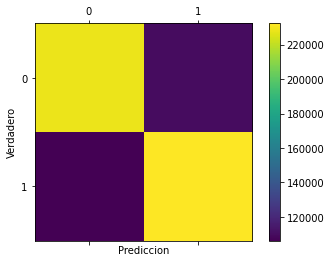

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lin_svm.predict(X_test))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')
plt.show()